In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb

import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [22]:
data = pd.read_csv(r'C:\Users\Igorr\Documents\ITMO5grade\Algorithm_BigData\transformed_df.csv')
data

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,gap
0,1.469388,-0.668554,1.076411,-0.142122,-1.721328,0.204872,0.124540,-0.928616,0.916921,0.139081,...,0.007040,0.043112,-0.129871,-0.156226,0.290855,-0.278131,0.085048,-0.059525,-0.202259,0.1980
1,-0.905386,-0.021379,0.982165,1.020709,0.464272,0.373376,-0.292111,-0.070220,0.382104,-0.420432,...,-0.160479,-0.030928,0.024482,-0.091469,0.108443,0.079146,0.056401,-0.021786,0.027404,0.3333
2,-1.067686,0.513928,0.616902,-0.118424,-0.976714,0.667737,-0.895176,0.769657,-1.125191,0.030964,...,0.101590,-0.189906,0.028406,-0.045021,-0.059086,0.088836,0.027742,-0.045370,-0.110276,0.2132
3,-0.900136,-0.533876,1.415162,-0.157348,-0.894643,0.253984,-0.488668,-0.696794,0.546881,0.292916,...,-0.017635,-0.067444,0.002548,0.100610,0.109330,0.087192,-0.142953,-0.035025,-0.005796,0.2477
4,-0.298237,0.331832,-0.451508,-0.977601,-0.094022,-0.127383,0.587089,0.279389,0.463904,0.614646,...,0.069204,0.095433,0.080770,0.009517,-0.092604,-0.063371,-0.009425,-0.112160,-0.044089,0.2612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,0.509840,-1.402572,0.743862,0.024143,-1.463671,0.939472,-0.102187,-1.104805,0.737460,-0.278304,...,0.252600,0.063326,-0.044326,-0.205857,0.125969,0.015095,-0.038669,0.087262,-0.151045,0.2748
19979,0.559429,0.031505,0.328474,0.369231,1.253546,-0.481275,-0.314377,0.463929,0.798011,0.769388,...,0.215970,-0.025356,-0.176429,-0.056611,-0.028676,-0.142015,0.185174,-0.056623,0.060753,0.1969
19980,1.224282,1.265662,-0.098595,0.048718,-0.540497,1.188516,0.473691,-0.332607,-0.224182,0.338531,...,-0.171555,0.076081,-0.085171,-0.121739,0.135503,-0.274326,0.033041,-0.109880,0.014818,0.2863
19981,-0.105584,1.527041,0.134381,-1.356124,-0.784500,-0.702794,0.354776,0.173158,0.666997,-0.152018,...,-0.019007,0.027799,0.223270,-0.038207,0.008267,-0.001095,-0.027280,0.037605,0.032226,0.2356


In [23]:
# Разделим данные на признаки и целевую переменную
X = data.drop('gap', axis=1)
y = data['gap']

print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19983 entries, 0 to 19982
Data columns (total 83 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       19983 non-null  float64
 1   1       19983 non-null  float64
 2   2       19983 non-null  float64
 3   3       19983 non-null  float64
 4   4       19983 non-null  float64
 5   5       19983 non-null  float64
 6   6       19983 non-null  float64
 7   7       19983 non-null  float64
 8   8       19983 non-null  float64
 9   9       19983 non-null  float64
 10  10      19983 non-null  float64
 11  11      19983 non-null  float64
 12  12      19983 non-null  float64
 13  13      19983 non-null  float64
 14  14      19983 non-null  float64
 15  15      19983 non-null  float64
 16  16      19983 non-null  float64
 17  17      19983 non-null  float64
 18  18      19983 non-null  float64
 19  19      19983 non-null  float64
 20  20      19983 non-null  float64
 21  21      19983 non-null  float64
 22

In [24]:
# Разделение данных на тренировочную и тестовую выборки с помощью кросс-валидации
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LightGBM

In [25]:
# Определим модель LightGBM
model = lgb.LGBMRegressor()

# Обучение модели
start_time = time.time()

model.fit(X_train, y_train)

training_time = time.time() - start_time

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21165
[LightGBM] [Info] Number of data points in the train set: 15986, number of used features: 83
[LightGBM] [Info] Start training from score 0.250591


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21165
[LightGBM] [Info] Number of data points in the train set: 17984, number of used features: 83
[LightGBM] [Info] Start training from score 0.250684
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21165
[LightGBM] [Info] Number of data points in the train set: 17984, number of used features: 83
[LightGBM] [Info] Start training from score 0.250652
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21165
[LightGBM] [Info] Number of data points in the train set: 17984, number of used features: 83
[LightGBM] [Info] Start 

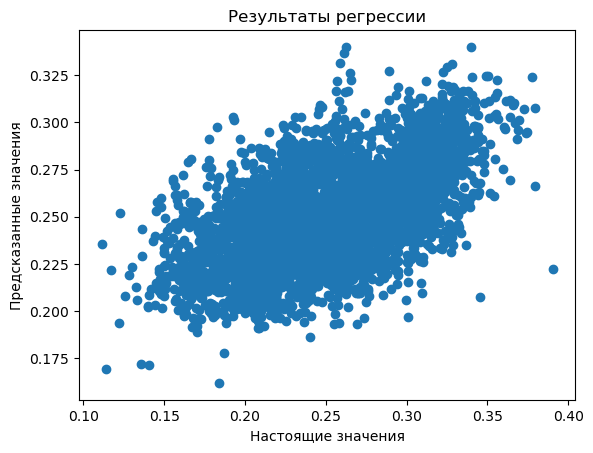

In [26]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик точности
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Кросс-валидация для оценки точности модели
cv_mse_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(cv_mse_scores)
cv_mae_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Визуализация результата и метрики точности
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("Результаты регрессии")
plt.show()

In [27]:
# Вывод результатов
print("Метрики на тестовой выборке:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

print("\nМетрики при кросс-валидации:")
print(f"Среднее MSE: {np.mean(cv_mse_scores)}")
print(f"Среднее RMSE: {np.mean(cv_rmse_scores)}")
print(f"Среднее MAE: {np.mean(cv_mae_scores)}")
print(f"Среднее R2: {np.mean(cv_r2_scores)}")

# Вывод времени обучения
print(f"\nВремя, затраченное на обучение модели: {training_time} секунд")

Метрики на тестовой выборке:
MSE: 0.00149744716659614
RMSE: 0.03869686249033815
MAE: 0.03205137517951332
R2: 0.33769402526190406

Метрики при кросс-валидации:
Среднее MSE: 0.0015071281011204498
Среднее RMSE: 0.03881652401351794
Среднее MAE: 0.032118454681200746
Среднее R2: 0.3242243919336515

Время, затраченное на обучение модели: 0.374112606048584 секунд


XGBoost

In [28]:
# Определим модель XGBoost
model = xgb.XGBRegressor()

# Обучение модели
start_time = time.time()

model.fit(X_train, y_train)

training_time = time.time() - start_time


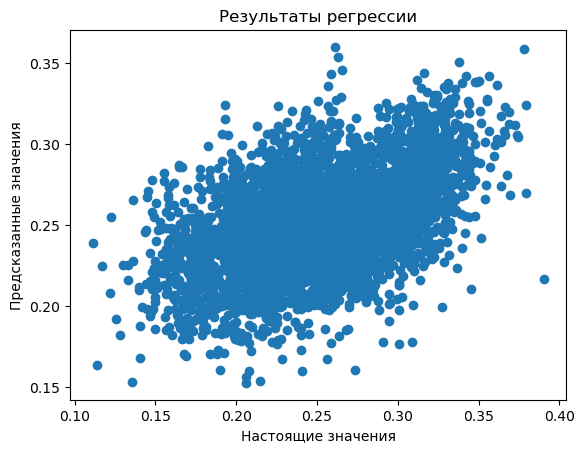

Метрики на тестовой выборке:
MSE: 0.0016729008894535895
RMSE: 0.040901111102922244
MAE: 0.03335944776241559
R2: 0.2600925902792761

Метрики при кросс-валидации:
Среднее MSE: 0.0016759029266799313
Среднее RMSE: 0.04093479876058105
Среднее MAE: 0.033505745166171996
Среднее R2: 0.24847718014212133

Время, затраченное на обучение модели: 1.0352017879486084 секунд


In [29]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик точности
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Кросс-валидация для оценки точности модели
cv_mse_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(cv_mse_scores)
cv_mae_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Визуализация результата и метрики точности
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("Результаты регрессии")
plt.show()

# Вывод результатов
print("Метрики на тестовой выборке:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")
print("\nМетрики при кросс-валидации:")
print(f"Среднее MSE: {np.mean(cv_mse_scores)}")
print(f"Среднее RMSE: {np.mean(cv_rmse_scores)}")
print(f"Среднее MAE: {np.mean(cv_mae_scores)}")
print(f"Среднее R2: {np.mean(cv_r2_scores)}")

# Вывод времени обучения
print(f"\nВремя, затраченное на обучение модели: {training_time} секунд")


Выбор модели

При сравнении двух методов были показаны результаты которые говорят о преимуществах использования LightGBM. 

LightGBM оказался лучше XGBoost в вашем случае, потому что он быстрее обучается, лучше справляется с нелинейными зависимостями и несбалансированными данными, а также эффективнее использует свои деревья (leaf-wise growth), что позволило достичь меньших ошибок и лучшего 
𝑅2.